In [1]:
import csv
import os
import json
import codecs
import re
import pandas as pd

In [2]:
import xlrd

In [ ]:
data = pd.read_excel('updated_bangla.xlsx')

In [3]:
data.drop(list(data.columns)[0],axis=1,inplace=True)

In [4]:
data_words = list(data['text']).copy()

In [5]:
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [7]:
data_words = data_words.copy()

In [8]:
str(data_words[3]).split(' ')

['24', '', 'ডেঙ্গু', '', 'আক্রান্ত', 'যুবরাজকে', 'ছাড়াই', 'নামছে', 'ভারত', '']

In [9]:
tokenized_data = [str(data_words[i]).split(' ') for i in range(len(data_words))]

In [10]:
for i in range(len(tokenized_data)):
    while '' in tokenized_data[i]:
        tokenized_data[i].remove('')

In [11]:
data_words = tokenized_data.copy()

In [12]:
data_words

[['ডেঙ্গু',
  'ডোঙ্গল',
  'লিখেছেন',
  'পোস্টটি',
  'করা',
  'হয়েছে',
  'বৃহস্পতিবার',
  '০৮',
  'জুলাই',
  '২০১০',
  '০২২৪৩৩',
  'পরিচ'],
 ['ডেঙ্গু',
  'ডোঙ্গল',
  'লিখেছেন',
  'আশাবাদী',
  'পোস্টটি',
  'করা',
  'হয়েছে',
  'শনিবার',
  '১০',
  'জুলাই',
  '২০১০',
  '২৩২৪৫৯',
  'ক্লাসিক্যাল',
  'ডেঙ্'],
 ['আবার', 'ডেঙ্গু', 'জ্বর', 'সতর্ক', 'থাকুন'],
 ['24', 'ডেঙ্গু', 'আক্রান্ত', 'যুবরাজকে', 'ছাড়াই', 'নামছে', 'ভারত'],
 ['ডেঙ্গু',
  'জ্বরের',
  'সেবাযত্ন',
  'ডেঙ্গু',
  'কি',
  '১ডেঙ্গু',
  'একটি',
  'ভাইরাসজনিত',
  'জ্বর',
  'এডিস',
  'মশার',
  'মাধ্যমে',
  'ডেঙ্গু',
  'জ্বর',
  'ছড়ায়'],
 ['চারিদিকে',
  'প্রচুর',
  'ডেঙ্গু',
  'জ্বরের',
  'প্রকোপ',
  'বেড়েছে',
  'ডেঙ্গু',
  'কি',
  '১ডেঙ্গু',
  'একটি',
  'ভাইরাসজনিত',
  'জ্বর',
  'এডিস',
  'মশার',
  'মাধ্'],
 ['ডেঙ্গু'],
 ['মশা',
  'দিয়ে',
  'মশা',
  'নিধন',
  'স্ত্রী',
  'এডিস',
  'মশার',
  'কামড়েই',
  'ডেঙ্গু',
  'জ্বর',
  'হয়ে',
  'থাকে',
  'বিশ্ব',
  'স্বাস্থ্য',
  'সংস্থার',
  'হিসাবে',
  'ব'],
 ['ডেঙ্গু',
  'জ্বর',
  'রুখতে',
  'ব

In [ ]:
''''
my_lst = []
places = []
places_index = []

for i in range (len(data_lemmatized)):
    for j in range (len(eng_lst_areas)):
        if eng_lst_areas[j] in data_lemmatized[i]:
            my_lst.append(data_lemmatized[i])
            places.append(eng_lst_areas[j])
            places_index.append(i)
            break
            
''''

In [30]:
len([data_words[i] for i in range(len(data_words)) if '' in data_words[i]])

46

In [ ]:
''''
data_words

string = [str(x) for x in data['datetime']]

string = [string[i].split(' ')[0] for i in range(len(string))]

year = [string[i].split('-')[0] for i in range(len(string))]

year = [int(year[i]) for i in range(len(year))]

data['year'] = year

two_thousand_nineteen = data[data['year'] == 2019].copy()

two_thousand_nineteen.drop(list(data.columns)[0],axis=1,inplace=True)

t_n = list(two_thousand_nineteen['text'])

tokenized_data = [str(t_n[i]).split(' ') for i in range(len(t_n))]

for i in range(len(tokenized_data)):
    while '' in tokenized_data[i]:
        tokenized_data[i].remove('')

t_n = tokenized_data.copy()


''''

In [114]:
mrittu = [data_words[i] for i in range(len(data_words)) if 'মৃত্যু' in data_words[i]]

In [115]:
mrittu_index = [i for i in range(len(data_words)) if 'মৃত্যু' in data_words[i]]

In [116]:
akranto = [data_words[i] for i in range(len(data_words)) if 'আক্রান্ত' in data_words[i]]

In [117]:
akranto_index = [i for i in range(len(data_words)) if 'আক্রান্ত' in data_words[i]]

In [118]:
vorti = [data_words[i] for i in range(len(data_words)) if 'ভর্তি' in data_words[i]]

In [119]:
vorti_index = [i for i in range(len(data_words)) if 'ভর্তি' in data_words[i]]

In [120]:
hashpatal = [data_words[i] for i in range(len(data_words)) if 'হাসপাতাল' in data_words[i]]

In [121]:
hashpatal_index = [i for i in range(len(data_words)) if 'হাসপাতাল' in data_words[i]]

In [122]:
hashpatal.extend([data_words[i] for i in range(len(data_words)) if 'হাসপাতালে' in data_words[i]])

In [123]:
hashpatal_index.extend([i for i in range(len(data_words)) if 'হাসপাতালে' in data_words[i]])

In [124]:
songkha = [data_words[i] for i in range(len(data_words)) if 'সংখ্যা' in data_words[i]]

In [125]:
songkha_index = [i for i in range(len(data_words)) if 'সংখ্যা' in data_words[i]]

In [126]:
oshustho = [data_words[i] for i in range(len(data_words)) if 'অসুস্থ' in data_words[i]]

In [127]:
oshustho_index = [i for i in range(len(data_words)) if 'অসুস্থ' in data_words[i]]

In [128]:
rogi = [data_words[i] for i in range(len(data_words)) if 'রোগী' in data_words[i]]

In [129]:
rogi_index = [i for i in range(len(data_words)) if 'রোগী' in data_words[i]]

In [130]:
jon = [data_words[i] for i in range(len(data_words)) if 'জন' in data_words[i]]

In [131]:
jon_index = [i for i in range(len(data_words)) if 'জন' in data_words[i]]

In [132]:
jon.extend([data_words[i] for i in range(len(data_words)) if 'জনের' in data_words[i]])

In [133]:
jon_index.extend([i for i in range(len(data_words)) if 'জনের' in data_words[i]])

In [134]:
rokto = [data_words[i] for i in range(len(data_words)) if 'রক্ত' in data_words[i]]

In [135]:
rokto_index = [i for i in range(len(data_words)) if 'রক্ত' in data_words[i]]

In [136]:
rokto.extend([data_words[i] for i in range(len(data_words)) if 'ব্লাড' in data_words[i]])

In [137]:
rokto_index.extend([i for i in range(len(data_words)) if 'ব্লাড' in data_words[i]])

In [238]:
rokto.extend([data_words[i] for i in range(len(data_words)) if 'ব্যাগ' in data_words[i]])

In [239]:
rokto_index.extend([i for i in range(len(data_words)) if 'ব্যাগ' in data_words[i]])

In [269]:
mrittu.extend([data_words[i] for i in range(len(data_words)) if 'প্রাণহানি' in data_words[i]])

In [270]:
mrittu_index.extend([i for i in range(len(data_words)) if 'প্রাণহানি' in data_words[i]])

In [271]:
total_index = mrittu_index + akranto_index + vorti_index + hashpatal_index + songkha_index + oshustho_index + rogi_index + jon_index + rokto_index

In [272]:
common = list(np.zeros(len(data_words)))

In [273]:
common = [int(common[i]) for i in range(len(common))]

In [274]:
len(common)

25461

In [275]:
total_posts = common.copy()
for i in range(len(total_index)):
    total_posts[total_index[i]] = 1

In [276]:
len(total_posts)

25461

In [277]:
data['total'] = total_posts

In [278]:
data['lem'] = data_words

In [279]:
data

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id,year,total,lem,week,flag
0,amader_projukti,800532433,ডেঙ্গু ডোঙ্গল লিখেছেন পোস্টটি করা হয়েছে ...,/amader_projukti/status/17980401617,0,0,0,2010-07-07 13:51:04,False,NaN,False,False,109006468,2010,0,"[ডেঙ্গু, ডোঙ্গল, লিখেছেন, পোস্টটি, করা, হয়েছে...",27,1
1,amader_projukti,1032367901,ডেঙ্গু ডোঙ্গল লিখেছেন আশাবাদী পোস্টটি করা হ...,/amader_projukti/status/18212237085,0,0,0,2010-07-10 10:50:55,False,NaN,False,False,109006468,2010,0,"[ডেঙ্গু, ডোঙ্গল, লিখেছেন, আশাবাদী, পোস্টটি, কর...",27,1
2,evergreenbangla,1433436804,আবার ডেঙ্গু জ্বর সতর্ক থাকুন,/evergreenbangla/status/18613305988,0,0,0,2010-07-15 09:09:40,False,NaN,False,False,84438985,2010,0,"[আবার, ডেঙ্গু, জ্বর, সতর্ক, থাকুন]",28,1
3,hotnewsbd,-241863221,24 ডেঙ্গু আক্রান্ত যুবরাজকে ছাড়াই নামছে ভারত,/hotnewsbd/status/21232973259,0,0,0,2010-08-15 07:06:45,False,NaN,False,False,42585005,2010,1,"[24, ডেঙ্গু, আক্রান্ত, যুবরাজকে, ছাড়াই, নামছে,...",32,1
4,banglablog,266655246,ডেঙ্গু জ্বরের সেবাযত্ন ডেঙ্গু কি ১ডেঙ্গু এক...,/banglablog/status/21741491726,0,0,0,2010-08-21 04:18:18,False,NaN,False,False,124526399,2010,0,"[ডেঙ্গু, জ্বরের, সেবাযত্ন, ডেঙ্গু, কি, ১ডেঙ্গু...",33,1
5,banglablog,418091587,চারিদিকে প্রচুর ডেঙ্গু জ্বরের প্রকোপ বেড়ে...,/banglablog/status/21892928067,0,0,0,2010-08-22 23:38:55,False,NaN,False,False,124526399,2010,0,"[চারিদিকে, প্রচুর, ডেঙ্গু, জ্বরের, প্রকোপ, বেড়...",33,1
6,mamun_rashid,1135167711,ডেঙ্গু,/mamun_rashid/status/22610004191,0,0,0,2010-08-31 05:05:41,False,NaN,False,False,26268856,2010,0,[ডেঙ্গু],35,1
7,banglablog,994050049,মশা দিয়ে মশা নিধন স্ত্রী এডিস মশার কামড়েই ...,/banglablog/status/5654905259819009,0,0,0,2010-11-19 08:13:29,False,NaN,False,False,124526399,2010,0,"[মশা, দিয়ে, মশা, নিধন, স্ত্রী, এডিস, মশার, কাম...",46,1
8,dw_bengali,-1920987136,ডেঙ্গু জ্বর রুখতে বিজ্ঞানীদের সাফল্য ডেঙ্গু ভ...,/dw_bengali/status/40998849648529408,0,0,0,2011-02-24 20:57:42,False,NaN,False,False,49979793,2011,0,"[ডেঙ্গু, জ্বর, রুখতে, বিজ্ঞানীদের, সাফল্য, ডেঙ...",8,1
9,energybangla,1568677888,ডেঙ্গু জ্বর রুখতে বিজ্ঞানীদের সাফল্য ডেঙ্গু ভ...,/energybangla/status/41021238507741184,0,0,0,2011-02-24 22:26:40,False,NaN,False,False,106387757,2011,0,"[ডেঙ্গু, জ্বর, রুখতে, বিজ্ঞানীদের, সাফল্য, ডেঙ...",8,1


In [280]:
not_find = data[data['total'] == 0]

In [281]:
not_find_2019 = not_find[not_find['year'] == 2019]

In [282]:
len(not_find_2019)

13844

In [283]:
len(not_find)

17584

In [157]:
data_word_2019_not = list(not_find_2019['lem'])

In [158]:
data_word_2019_not

[['মশাবাহিত',
  'রোগ',
  'ডেঙ্গুর',
  'লক্ষণ',
  'করণীয়',
  'ও',
  'প্রতিকার',
  'বিষয়ে',
  'সঠিক',
  'ধারণাই',
  'এই',
  'রোগ',
  'থেকে',
  'আপনাকে',
  'নিরাপদ',
  'রাখতে',
  'পারে',
  'নিজে',
  'সচেতন',
  'হোন',
  'অন্যকে',
  'সচেতন',
  'করুনডেঙ্গু',
  'স্বাস্থ্যওপরিবারকল্যাণমন্ত্রণালয়',
  'এইচডিমিডিয়া'],
 ['নতুন',
  'দুই',
  'নাটকে',
  'জুটি',
  'বেঁধে',
  'অভিনয়',
  'করছেন',
  'আখম',
  'হাসান',
  'ও',
  'সুস্মিতা',
  'নাটক',
  'দু’টির',
  'নাম',
  '‘কিস্তি',
  'কাদের’',
  'ও',
  '‘',
  'ডেঙ্গু',
  'নাসির’'],
 ['এর',
  'পরিবেশনায়',
  'দ্বিতীয়',
  'পর্বঃ',
  '_',
  'ও',
  'দুটি',
  '"',
  'ডেঙ্গু',
  'নাসির"',
  '&',
  '"কিস্তি',
  'কাদের"',
  'স্বল্প',
  'দৈর্ঘ্য',
  'চলচ্চিত্রের',
  'কাজ',
  'সম্পন্ন',
  'হয়েছে',
  'অভিনয়েঃ',
  'আখম',
  'হাসান',
  'ও',
  'সুস্মিতা',
  'সিনহা',
  'এস',
  'কে',
  'রায়হান'],
 ['ডেঙ্গু', 'আক্রান্তে', 'রেকর্ড'],
 ['"',
  'ডেঙ্গু',
  'জ্বর',
  'এর',
  'লক্ষন',
  'ও',
  'করনীয়নিয়ে',
  'কথা',
  'বললেন',
  'সহযোগী',
  'অধ্যাপক',
  'ডাঃ',
  'আহমে

In [ ]:
two_thousand_nineteen['week'] = two_thousand_nineteen['datetime'].dt.week

In [169]:
data['week'] = data['datetime'].dt.week

In [170]:
two_thousand_nineteen = data[data['year'] == 2019].copy()

In [180]:
import matplotlib.pyplot as plt

%matplotlib inline

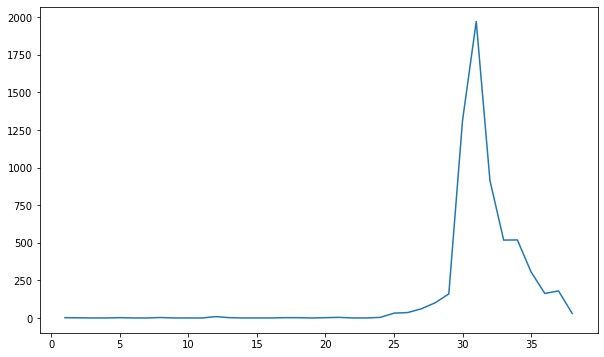

In [197]:
plt.figure(figsize=(10,6))
plt.plot(list(two_thousand_nineteen.groupby(['week']).sum().index) , list(two_thousand_nineteen.groupby(['week']).sum()['total']))

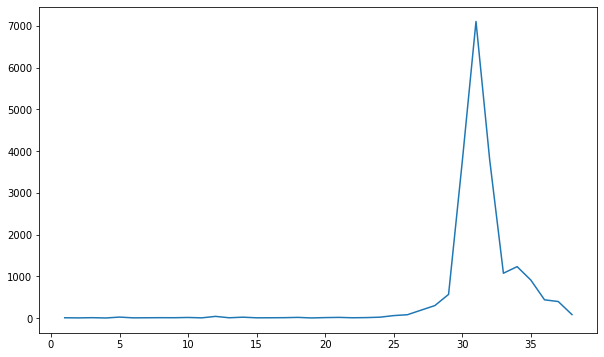

In [198]:
plt.figure(figsize=(10,6))
plt.plot(list(two_thousand_nineteen.groupby(['week']).sum().index) , list(two_thousand_nineteen.groupby(['week']).sum()['flag']))

In [195]:
two_thousand_nineteen['flag'] = [1 for i in range(len(two_thousand_nineteen))]

In [196]:
two_thousand_nineteen.groupby(['week']).sum()

,ID,nbr_retweet,nbr_favorite,nbr_reply,has_media,is_reply,is_retweet,user_id,year,total,flag
week,,,,,,,,,,,
1,-2272636925,0,85,4,1.0,0.0,0.0,295462556,12114,2,6
2,-1119502334,0,2,0,2.0,0.0,0.0,910919260,6057,1,3
3,1894801412,0,0,1,4.0,1.0,0.0,53823395,16152,0,8
4,-1365942271,0,2,0,0.0,1.0,0.0,-728436730,2019,0,1
5,-7538900972,33,161,1,4.0,0.0,0.0,7270052762,44418,2,22
6,-1076285438,0,0,0,1.0,0.0,0.0,670332893,8076,0,4
7,-649576441,0,0,0,2.0,0.0,0.0,484486844,12114,0,6
8,-868933623,12,67,1,1.0,0.0,0.0,-2482518735,16152,3,8
9,3927511060,5,9,1,0.0,1.0,0.0,-2444033665,14133,0,7


In [209]:
list(two_thousand_nineteen[two_thousand_nineteen['week'] == 31]['lem'])

[['ডেঙ্গু', '\xa0মোকাবেলায়', 'জিপিএস', 'ট্র্যাকার', 'আতিকুল'],
 ['বোয়ালখালীতে',
  'ডেঙ্গু',
  'জ্বরে',
  'আক্রান্ত',
  'রোগী',
  'সনাক্ত',
  'সবাই',
  'সতর্ক',
  'থাকবেন',
  '—'],
 ['ঢাকার', 'বাইরে', '৬১১', 'ডেঙ্গু', 'রোগী\xa0শনাক্ত'],
 ['লক্ষন',
  'সুবিধার',
  'মনে',
  'হচ্ছে',
  'নাসকলেই',
  'আমার',
  'জন্য',
  'দোয়া',
  'করবেন',
  'ডেঙ্গু',
  'রোগ',
  'নির্ণয়ের',
  'জন্য',
  'ব্লাড',
  'টেস্ট',
  'করতে',
  'যাচ্ছি',
  '—',
  'k'],
 ['আমার',
  'মামা',
  'ডেঙ্গু',
  'জ্বরে',
  'আক্রান্ত',
  'ডাক্তার',
  'বলছে',
  'তার',
  'বর্তমান',
  'অবস্থা',
  'ভালো',
  'না',
  'তার',
  'জন্যে',
  'আজই',
  'রক্তের',
  'প্রয়োজন',
  'রক্তের',
  'গ্রুপঃ',
  'বি',
  'নেগেটিভস্থানঃ',
  'পাবনা',
  'সদর',
  'হাসপাতাল',
  'নিচতলার',
  'ডান',
  'পাশে',
  'পুরুষ',
  'মেডিসিন',
  'ওয়ার্ডযোগাযোগঃ',
  '01742019828সংগৃহীত',
  'পোস্ট'],
 ['দেশের',
  'বর্তমান',
  'পরিস্থিতি১',
  'মা',
  'স্কুল',
  'থেকে',
  'নেয়ার',
  'পথে',
  'বাচ্চাকে',
  'বলছেঃ',
  'বাবু',
  'কান্না',
  'করিস',
  'না',
  'মানুষ',
  'ছেলে

In [199]:
two_thousand_nineteen

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id,year,total,lem,week,flag
5257,CorporateSangb,672649216,২০১৮ সালে ডেঙ্গু আক্রান্ত ও মৃত্যুতে রেকর্ড,/CorporateSangb/status/1081061153319669760,0,0,0,2019-01-03 21:33:58,False,NaN,False,False,626384896,2019,1,"[২০১৮, সালে, ডেঙ্গু, আক্রান্ত, ও, মৃত্যুতে, রে...",1,1
5258,humandmedia,-19435519,মশাবাহিত রোগ ডেঙ্গুর লক্ষণ করণীয় ও প্রতিকার ব...,/humandmedia/status/1081203625282727937,0,0,0,2019-01-04 07:00:06,False,NaN,False,False,-824954880,2019,0,"[মশাবাহিত, রোগ, ডেঙ্গুর, লক্ষণ, করণীয়, ও, প্র...",1,1
5259,DailyJugantor,-1265119231,নতুন দুই নাটকে জুটি বেঁধে অভিনয় করছেন আখম হাস...,/DailyJugantor/status/1081481529895931905,0,8,0,2019-01-05 01:24:24,True,https://t.co/eBsmPoaZLy,False,False,-1695361112,2019,0,"[নতুন, দুই, নাটকে, জুটি, বেঁধে, অভিনয়, করছেন,...",1,1
5260,munshiganjtimes,-837369855,এর পরিবেশনায় দ্বিতীয় পর্বঃ _ ও দুটি...,/munshiganjtimes/status/1081602691351101441,0,0,0,2019-01-05 09:25:51,False,NaN,False,False,-1844195601,2019,0,"[এর, পরিবেশনায়, দ্বিতীয়, পর্বঃ, _, ও, দুটি, ...",1,1
5261,crimeexpressbd,-1776889856,ডেঙ্গু আক্রান্তে রেকর্ড,/crimeexpressbd/status/1081815325652471808,0,0,0,2019-01-05 23:30:47,False,NaN,False,False,2056749056,2019,0,"[ডেঙ্গু, আক্রান্তে, রেকর্ড]",1,1
5262,Silentboy36,953528320,আমার জন্য চোখের কোনায় পানি জমা করে রেখো না কা...,/Silentboy36/status/1081955099503603712,0,77,4,2019-01-06 08:46:12,False,NaN,False,False,1976840197,2019,1,"[আমার, জন্য, চোখের, কোনায়, পানি, জমা, করে, রে...",1,1
5263,m_adhikarylive,248958976,রক্ত দিয়ে লাভ লেটার লেখার চক্করে না জানি কত স...,/m_adhikarylive/status/1082596895762075648,0,0,0,2019-01-08 03:16:28,False,NaN,False,False,789168654,2019,1,"[রক্ত, দিয়ে, লাভ, লেটার, লেখার, চক্করে, না, জ...",2,1
5264,rtvonline,-1965592576,""" ডেঙ্গু জ্বর এর লক্ষন ও করনীয়নিয়ে কথা বললে...",/rtvonline/status/1084072051604942848,0,1,0,2019-01-12 04:58:12,True,NaN,False,False,60875303,2019,0,"["", ডেঙ্গু, জ্বর, এর, লক্ষন, ও, করনীয়নিয়ে, ক...",2,1
5265,rtvonline,597131266,ডেঙ্গু জ্বর এর লক্ষন ও করনীয়নিয়ে কথা বললেন ...,/rtvonline/status/1084660945723555842,0,1,0,2019-01-13 19:58:16,True,NaN,False,False,60875303,2019,0,"[ডেঙ্গু, জ্বর, এর, লক্ষন, ও, করনীয়নিয়ে, কথা,...",2,1
5266,AajbikelC,-1034616832,ডেঙ্গু রুখতে থার্মোকলের থালা ব্যবহারে নিষিদ্ধ...,/AajbikelC/status/1085161780228194304,0,0,0,2019-01-15 05:08:24,False,NaN,False,False,-1475018752,2019,0,"[ডেঙ্গু, রুখতে, থার্মোকলের, থালা, ব্যবহারে, নি...",3,1


In [211]:
data['flag'] = [1 for i in range(len(data))]

In [214]:
data.groupby(['year']).sum().index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='year')

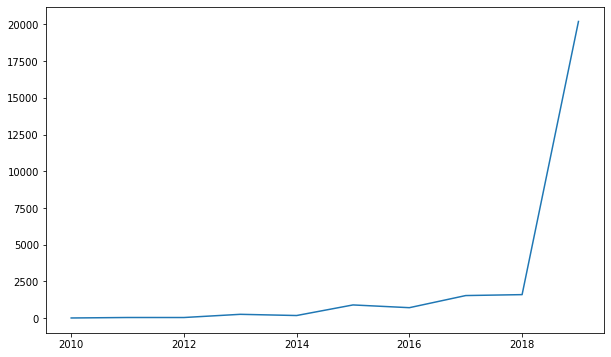

In [218]:
plt.figure(figsize=(10,6))
plt.plot(list(data.groupby(['year']).sum().index),list(data.groupby(['year']).sum()['flag']))

In [233]:
one_txt = list(data[data['total'] == 1]['text'])

In [287]:
one_txt

['24  ডেঙ্গু  আক্রান্ত যুবরাজকে ছাড়াই নামছে ভারত ',
 'রামেক হাসপাতালে  ডেঙ্গু  রোগী সনাক্ত রাজশাহী মেডিকেল কলেজ রামেক হাসপাতালে  ডেঙ্গু  জ্বরে আক্রান্ত এক রোগী সনাক্ত ',
 'রামেক হাসপাতালে  ডেঙ্গু  রোগী সনাক্ত রাজশাহী মেডিকেল কলেজ রামেক হাসপাতালে  ডেঙ্গু  জ্বরে আক্রান্ত এক রোগী সনাক্ত ',
 'রামেক হাসপাতালে  ডেঙ্গু  রোগী সনাক্ত রাজশাহী মেডিকেল কলেজ রামেক হাসপাতালে  ডেঙ্গু  জ্বরে আক্রান্ত এক রোগী সনাক্ত ',
 'ডেঙ্গু  প্রতিরোধে করণীয় এখন ডেঙ্গুজ্বরে অনেকেই আক্রান্ত হচ্ছেন বিচ্ছিন্নভাবে থেমে থেমে বৃষ্টির মৌসুম এটা ফলে ড',
 'ডেঙ্গু  প্রতিরোধে করণীয় এখন ডেঙ্গুজ্বরে অনেকেই আক্রান্ত হচ্ছেন বিচ্ছিন্নভাবে থেমে থেমে বৃষ্টির মৌসুম এটা ফলে ড',
 ' ডেঙ্গুতে চিকিৎ সকের মৃত্যু আক্রান্ত ১৬১ জন রাজধানীর বেসরকারি হাসপাতালে  ডেঙ্গু',
 'হঠাৎ করে রাজধানীতে বেড়েছে ডেঙ্গুর প্রকোপ হাসপাতালগুলোতে প্রতিদিনই ভর্তি হচ্ছে  ডেঙ্গু আক্রান্ত রোগী ',
 'ডেঙ্গু  প্রতিরোধে করণীয় এখন ডেঙ্গুজ্বরে আক্রান্ত হচ্ছেন অনেকেই বৃষ্টির মৌসুম এটা ফলে  ডেঙ্গু',
 'ডেঙ্গু  প্রতিরোধে করণীয় এখন ডেঙ্গুজ্বরে আক্রান্ত হচ্ছেন অনেকেই বৃষ্টির মৌসু

In [253]:
jon

[['ডেঙ্গুতে',
  'চিকিৎ',
  'সকের',
  'মৃত্যু',
  'আক্রান্ত',
  '১৬১',
  'জন',
  'রাজধানীর',
  'বেসরকারি',
  'হাসপাতালে',
  'ডেঙ্গু'],
 ['একজন',
  'ডেঙ্গু',
  'রোগীর',
  'জন্যে',
  'জরুরী',
  'ভিত্তিতে',
  '4',
  'জন',
  'ডোনার',
  'প্রয়োজন'],
 ['ঢাকার',
  'একটি',
  'ডোবাতে',
  'মানব',
  'গোষ্ঠি',
  'ঔষধ',
  'ছিটানোর',
  'ফলে',
  '১৪৮',
  'জন',
  'মহান',
  'ডেঙ্গু',
  'মশা',
  'আহত',
  'হওন',
  '&',
  '৮০',
  'জন',
  'সাধারণ',
  'মশা'],
 ['দিল্লিতে',
  'আরও',
  '৫',
  'জন',
  'ডেঙ্গু',
  'আক্রান্তের',
  'মৃত্যুমোট',
  'ডেঙ্গু',
  'আক্রান্ত',
  'মানুষের',
  'সংখ্যা',
  '১৮৭২k'],
 ['দিল্লিতে', 'ডেঙ্গু', 'জ্বরে', 'পাঁচজনের', 'মৃত্যু', 'আহত', '১৮৭২', 'জন'],
 ['ডেঙ্গু',
  'নিয়ে',
  'জন',
  'সচেতনতা',
  'বৃদ্ধি',
  'করতে',
  'পুরীর',
  'সৈকতে',
  'বালু',
  'শিল্পী',
  'সুদর্শন',
  'পট্টনায়েকের',
  'তৈরি',
  'একটি',
  'অসাধারণ',
  'শিল্পকর্ম'],
 ['দোয়া',
  'চাই',
  'সকলের',
  'আল্লাহর',
  'অশেষ',
  'রহমতে',
  'ডেঙ্গু',
  'সেরে',
  'বউ',
  'কিছুটা',
  'সুস্থ্য',
  'হলেও',
  'বাসায়',
  'এখন',
  

In [299]:
len(data[data['total'] == 1])

7877

In [298]:
sec_chunk[sec_chunk['total'] == 1][['lem']].to_excel('chunk\chunk2.xlsx')

In [307]:
list(two_thousand_nineteen['text'])[3]

'     এর পরিবেশনায়  দ্বিতীয় পর্বঃ  _   ও দুটি " ডেঙ্গু  নাসির" & "কিস্তি কাদের" স্বল্প দৈর্ঘ্য চলচ্চিত্রের কাজ সম্পন্ন হয়েছে অভিনয়েঃ আখম হাসান ও সুস্মিতা সিনহা এস কে রায়হান '